# COGS 108 - EDA Checkpoint Testing

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

all_ages = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/all-ages.csv")
recent_grads = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/recent-grads.csv")
grad_students = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/grad-students.csv")


## Data Cleaning

In [2]:
#Here we remove some of the columns from recent_grads that do not pertain to our question, including:
#ShareWomen, Median, P25th, and P75th
trim_recent_grads = recent_grads.drop(['ShareWomen', 'Median', 'P25th', 'P75th'], axis=1)

#Here we remove some of the columns from grad_students that are not relevant to our future analysis.
#Grad_median, Grad_P25, Grad_P75, Nongrad_median, Nongrad_P25, and Nongrad_P75
trim_grad_students = grad_students.drop(['Grad_median', 'Grad_P25', 'Grad_P75', 'Nongrad_median', 'Nongrad_P25', 'Nongrad_P75'], axis=1)

#checking for null values in the datasets
print(all_ages.isnull().sum().sum())
print(trim_grad_students.isnull().sum().sum())
trim_recent_grads.isnull().sum()

0
0


Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [3]:
#checking which value has null
trim_recent_grads[trim_recent_grads['Total'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,36,3149,2558,1121,1735,338,0.096931,1183,1274,485


In [4]:
trim_recent_grads = trim_recent_grads.drop(trim_recent_grads.index[21])
trim_recent_grads.isnull().sum().sum()

0

## Exploratory Data Analysis

### Comparing Employment Circumstances for `recent_grads`

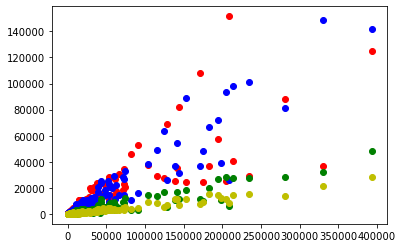

In [5]:
#Comparing the amount of 'College jobs', 'Non college jobs', and 'Low wage jobs' in majors according to their popularity

trim_recent_grads = trim_recent_grads.sort_values(by='Total')

x=trim_recent_grads['Total']
plt.scatter(x, trim_recent_grads['College_jobs'], color='r')
plt.scatter(x, trim_recent_grads['Non_college_jobs'], color='b')
plt.scatter(x, trim_recent_grads['Low_wage_jobs'], color='g')
plt.scatter(x, trim_recent_grads['Unemployed'], color='y')

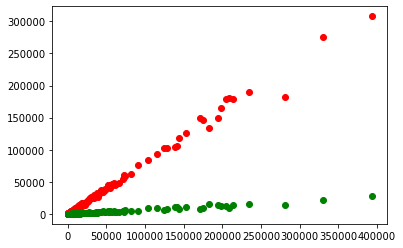

In [6]:
#comparing the counts for employed grads and umployed grads by a major's popularity

plt.scatter(x, trim_recent_grads['Employed'], color='r')
plt.scatter(x, trim_recent_grads['Unemployed'], color='g')

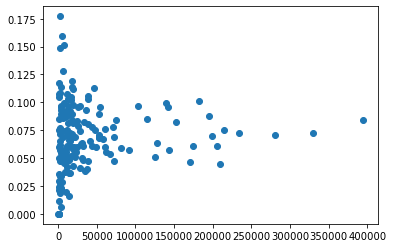

In [7]:
#comparing unemployment rates and major popularity

plt.scatter(x, trim_recent_grads['Unemployment_rate'])

In [8]:
#Splitting the trim_recent_grads datasets into a 'Most popular' and 'Less popular' categories 
print(trim_recent_grads['Total'].max())
print(trim_recent_grads['Total'].min())
print(trim_recent_grads['Total'].max()/4)

top_recent_grads = trim_recent_grads[trim_recent_grads['Total'] > 98433.75]
lower_recent_grads = trim_recent_grads[trim_recent_grads['Total'] < 98433.75]
print(len(top_recent_grads))
print(len(lower_recent_grads))

393735.0
124.0
98433.75
20
152


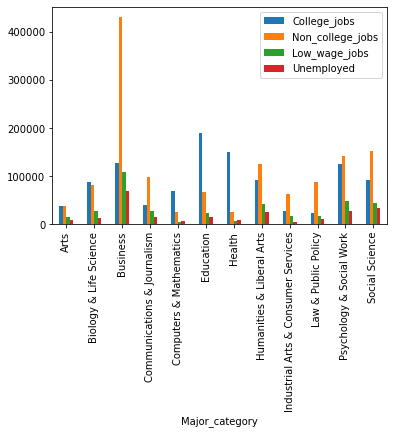

In [9]:
#Grouping the more popular majors by major category and plotting the counts for job circumstances.
top_recent_grads.groupby('Major_category').sum()[['College_jobs',
                                                  'Non_college_jobs',
                                                  'Low_wage_jobs',
                                                  'Unemployed']].plot(kind='bar')

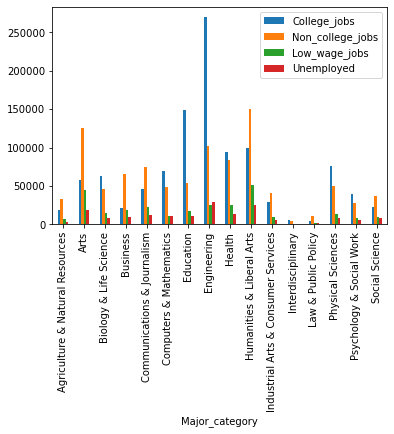

In [10]:
#Grouping the less popular majors by major category and plotting the counts for job circumstances.
lower_recent_grads.groupby('Major_category').sum()[['College_jobs',
                                                    'Non_college_jobs',
                                                    'Low_wage_jobs',
                                                    'Unemployed']].plot(kind='bar')

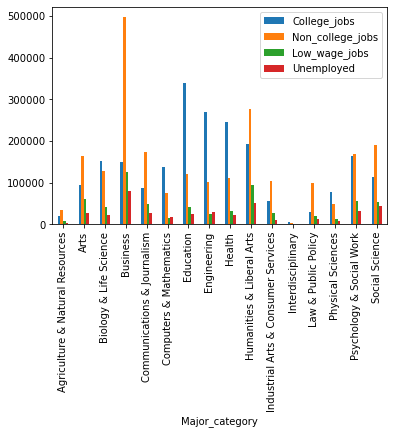

In [11]:
#Grouping the total majors by major category and plotting the counts for job circumstances.
recent_grads.groupby('Major_category').sum()[['College_jobs',
                                              'Non_college_jobs',
                                              'Low_wage_jobs',
                                              'Unemployed']].plot(kind='bar')

In [12]:
outcome, predictors = patsy.dmatrices('Unemployed ~ Total', trim_recent_grads)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Unemployed   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3242.
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          1.21e-112
Time:                        23:48:44   Log-Likelihood:                -1417.4
No. Observations:                 172   AIC:                             2839.
Df Residuals:                     170   BIC:                             2845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.2343     82.858     -0.763      0.4

### Comparing `recent_grads` Dataset, broken down by `Major_category`

In [13]:
trim_recent_grads['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources         9
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

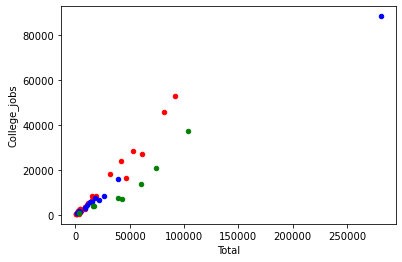

In [14]:
#plotting individual majors and comparing their college jobs, non college jobs, and low paying jobs counts.
engineering = trim_recent_grads[trim_recent_grads['Major_category'] == 'Engineering']
bio = trim_recent_grads[trim_recent_grads['Major_category'] == 'Biology & Life Science']
arts = trim_recent_grads[trim_recent_grads['Major_category'] == 'Arts']

ax1 = engineering.plot(kind='scatter', x='Total', y ='College_jobs', color='r')
ax2 = bio.plot(kind='scatter', x='Total', y='College_jobs', color='b', ax=ax1)
ax3 = arts.plot(kind='scatter', x='Total', y ='College_jobs', color='g', ax=ax1)

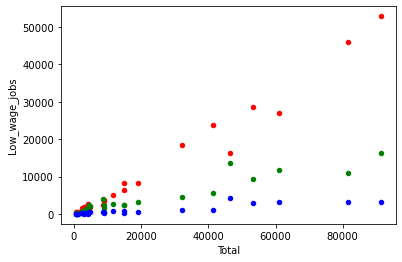

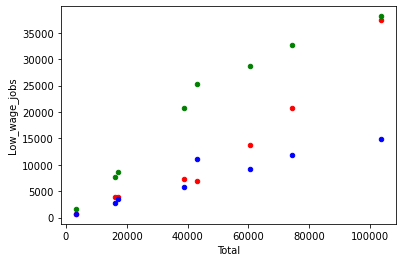

In [15]:
#comparison of engineering majors and their job circumstances
eng1 = engineering.plot(kind='scatter', x='Total', y ='College_jobs', color='r')
eng2 = engineering.plot(kind='scatter', x='Total', y ='Non_college_jobs', color='g', ax=eng1)
eng3 = engineering.plot(kind='scatter', x='Total', y ='Low_wage_jobs', color='b', ax=eng1)

#comparison of art majors and their job circumstances
art1 = arts.plot(kind='scatter', x='Total', y ='College_jobs', color='r')
art2 = arts.plot(kind='scatter', x='Total', y ='Non_college_jobs', color='g', ax=art1)
art3 = arts.plot(kind='scatter', x='Total', y ='Low_wage_jobs', color='b', ax=art1)

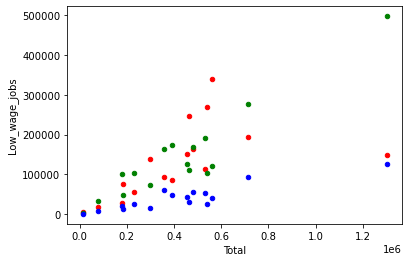

In [16]:
#grouping recent grads by category and comparing their job circumstances
category = trim_recent_grads.groupby('Major_category').sum()
category = category.drop(['Rank', 'Major_code', 'Unemployment_rate'], axis=1)

cat1 = category.plot(kind='scatter', x='Total', y='College_jobs', color='r')
cat2 = category.plot(kind='scatter', x='Total', y='Non_college_jobs', color ='g', ax=cat1)
cat3 = category.plot(kind='scatter', x='Total', y='Low_wage_jobs', color='b', ax=cat1)

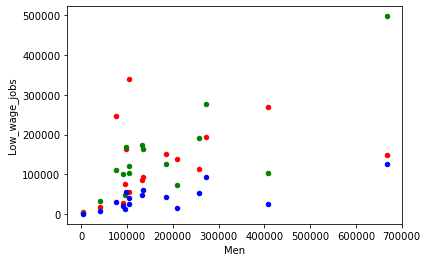

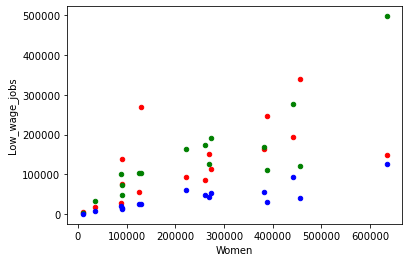

In [17]:
#comparison of men/women recent grads and comparing their job circumstances

men1 = category.plot(kind='scatter', x='Men', y='College_jobs', color='r')
men2 = category.plot(kind='scatter', x='Men', y='Non_college_jobs', color ='g', ax=men1)
men3 = category.plot(kind='scatter', x='Men', y='Low_wage_jobs', color='b', ax=men1)

women1 = category.plot(kind='scatter', x='Women', y='College_jobs', color='r')
women2 = category.plot(kind='scatter', x='Women', y='Non_college_jobs', color ='g', ax=women1)
women3 = category.plot(kind='scatter', x='Women', y='Low_wage_jobs', color='b', ax=women1)

### Comparing `all_ages` dataset

In [18]:
all_age_cat = all_ages.groupby('Major_category').sum()
all_age_cat = all_age_cat.drop(['Major_code', 'Unemployment_rate', 'Median', 'P25th', 'P75th'], axis=1)
all_age_cat

,Total,Employed,Employed_full_time_year_round,Unemployed
Major_category,,,,
Agriculture & Natural Resources,632437,480415,389188,18551
Arts,1805865,1308695,854606,104125
Biology & Life Science,1338186,947058,682524,57335
Business,9858741,7529851,6171326,434397
Communications & Journalism,1803822,1423041,1068187,101199
Computers & Mathematics,1781378,1410607,1170178,79974
Education,4700118,2833199,1867112,125336
Engineering,3576013,2621966,2216012,146389
Health,2950859,2192692,1535113,75013


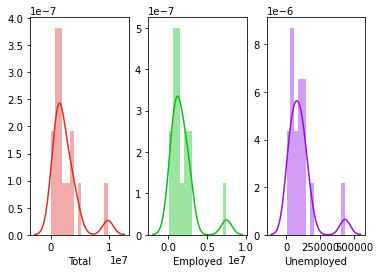

In [19]:
#plotting the distributions of all grad job circumstances
plt.subplot(1,3,1)
sns.distplot(all_age_cat['Total'], bins=15, color='#DE2D26')
plt.subplot(1,3,2)
sns.distplot(all_age_cat['Employed'], bins=15, color='#0CBD18')
plt.subplot(1,3,3)
sns.distplot(all_age_cat['Unemployed'], bins=15, color='#940CE8')

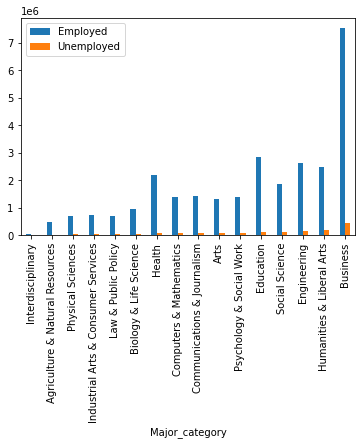

In [20]:
#comparing employed vs unemployed for all grads
all_age_cat[['Employed', 'Unemployed']].sort_values(by='Unemployed').plot(kind='bar')

In [21]:
outcome, predictors = patsy.dmatrices('Employed ~ Total', all_age_cat)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Employed   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1139.
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           8.19e-15
Time:                        23:48:46   Log-Likelihood:                -216.72
No. Observations:                  16   AIC:                             437.4
Df Residuals:                      14   BIC:                             439.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.222e+04   7.35e+04     -0.574      0.5

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
